X_test shape: (16057, 2)
Predictions shape: (16057,)

First 10 predictions: [1 1 1 1 1 1 1 1 1 1]

Unique values in predictions: [-1  1]

Number of outliers detected: 13
Number of inliers detected: 16044
Percentage of outliers: 0.08%


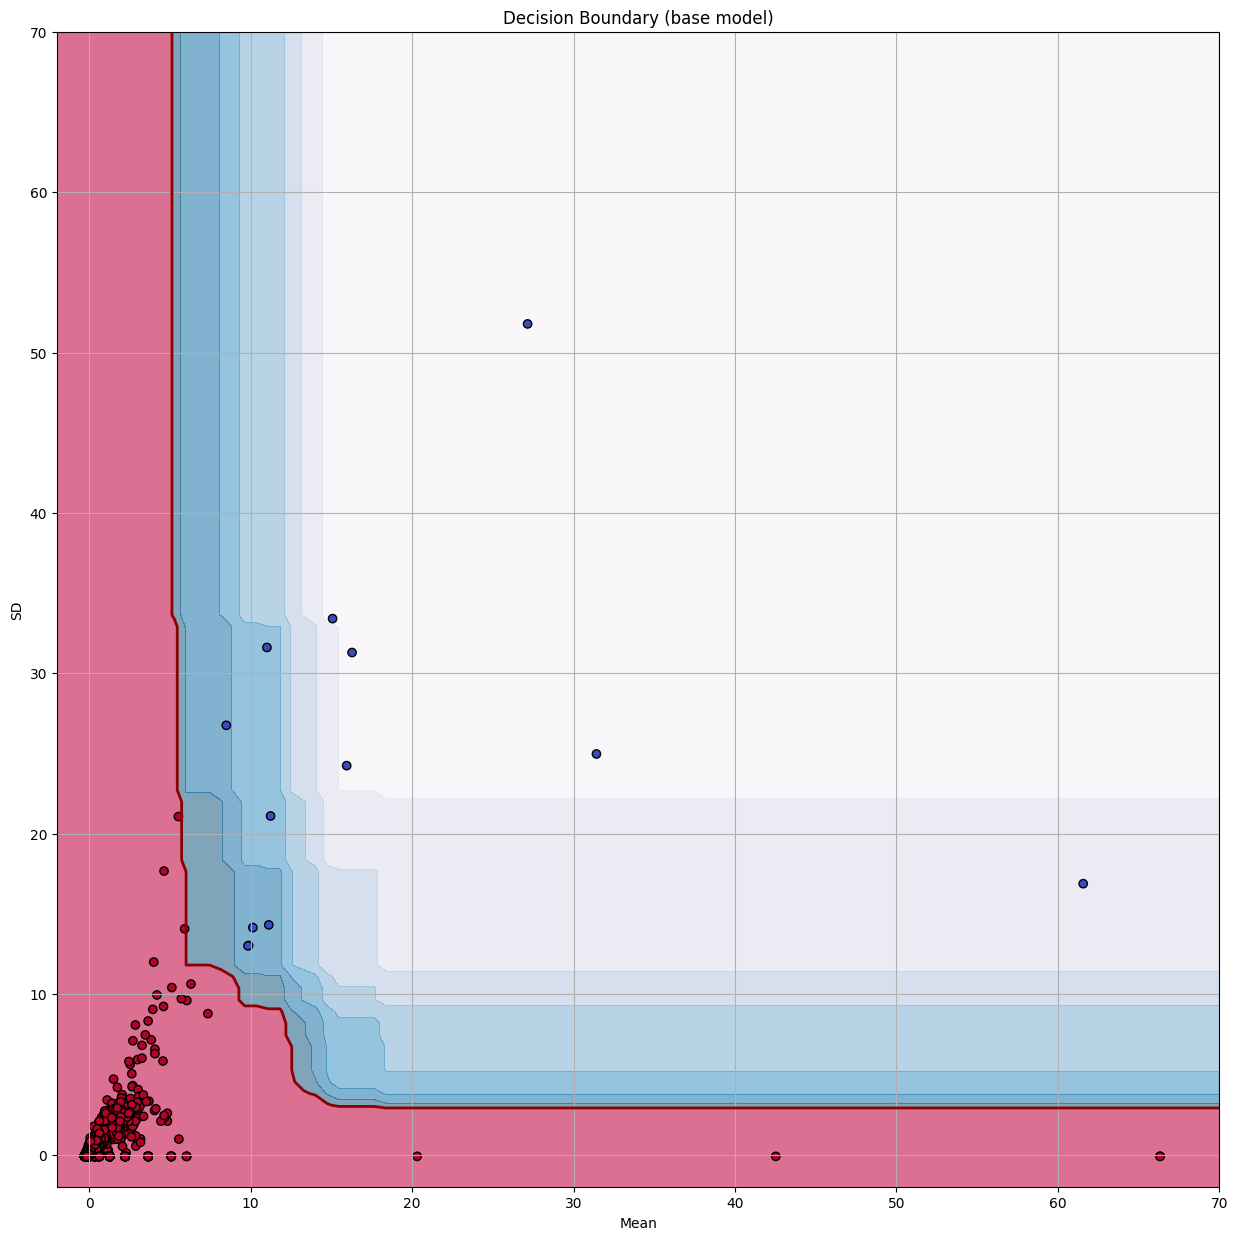


Prediction distribution:
{-1: 13, 1: 16044}


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
from joblib import dump
from sklearn.ensemble import IsolationForest

# Load the training dataset
train_data = pd.read_csv('train.csv')
# Load the test dataset
test_data = pd.read_csv('test.csv')

X_test = test_data[['mean', 'sd']]
X_train = train_data[['mean', 'sd']]

# Create an instance of the IsolationForest model
isolation_forest = IsolationForest(contamination=0.001, random_state=16)

# Train the model on the TRAINING dataset (not test dataset)
isolation_forest.fit(X_train)  # Changed from X_test to X_train

# Generate predictions for test data
predictions = isolation_forest.predict(X_test)

# Now check the shapes
print("X_test shape:", X_test.shape)
print("Predictions shape:", predictions.shape)

# Print first few predictions to verify they are -1 or 1
print("\nFirst 10 predictions:", predictions[:10])

# Confirm we only have -1 and 1 in our predictions
print("\nUnique values in predictions:", np.unique(predictions))

# Show the count of outliers (-1) and inliers (1)
outliers = (predictions == -1).sum()
inliers = (predictions == 1).sum()
print(f"\nNumber of outliers detected: {outliers}")
print(f"Number of inliers detected: {inliers}")
print(f"Percentage of outliers: {(outliers/(outliers+inliers))*100:.2f}%")



# Change the plot's size
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = isolation_forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Decision Boundary (base model)")
# Draw the "soft" or secondary boundaries
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# Draw the line that separates the hard from the soft boundaries
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# Draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(X_test.iloc[:, 0],
           X_test.iloc[:, 1],
           c=predictions,
           cmap='coolwarm',
           edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

# Let's also check the distribution of predictions
unique, counts = np.unique(predictions, return_counts=True)
print("\nPrediction distribution:")
print(dict(zip(unique, counts)))




In [3]:
# Import joblib
#from joblib import dump

# Export the trained model
# Note: Make sure the isolation_forest model is already trained before this step
dump(isolation_forest, 'model.joblib')

print("Model has been successfully exported as 'model.joblib'")

# Optional: To verify the export, you can try to load it back
from joblib import load
loaded_model = load('model.joblib')
print("\nModel loaded successfully!")

# Optional: Test the loaded model to verify it works
test_predictions = loaded_model.predict(X_test[:5])
print("\nTest predictions from loaded model (first 5 samples):", test_predictions)

Model has been successfully exported as 'model.joblib'

Model loaded successfully!

Test predictions from loaded model (first 5 samples): [1 1 1 1 1]
